In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [2]:
cd=pd.read_csv("crime_data.csv")
cd

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


### Standardizing the data

In [3]:
 from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_cd = scaler.fit_transform(cd.iloc[:,1:])

### Finding the optimum number of clusters

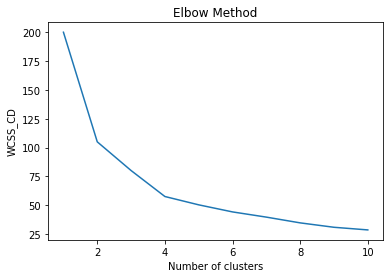

In [4]:
wcss_cd = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_cd)
    wcss_cd.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss_cd)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS_CD')
plt.show()

### It's safe to say that the elbow point is at 4. That means the number of optimum clusters are four

### Build Cluster algorithm

In [5]:
from sklearn.cluster import KMeans
clusters_cd = KMeans(4, random_state=42)
clusters_cd.fit(scaled_cd)

KMeans(n_clusters=4, random_state=42)

In [6]:
clusters_cd.labels_

array([0, 3, 3, 0, 3, 3, 1, 1, 3, 0, 1, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1, 3,
       2, 0, 3, 2, 2, 3, 2, 1, 3, 3, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 3, 1,
       2, 1, 1, 2, 2, 1])

### As above, it can be seen that the cluster numbering is provided to each data point in the data set in the form of an array, so to make it simpler, assigning the clusters to the data set;

In [7]:
cd['clusterid'] = clusters_cd.labels_

### Using groupby function to group the data by the cluster order and using the mean function to compare the clusters using average values

In [8]:
cd.groupby('clusterid').agg(['mean']).reset_index()

,clusterid,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,13.937500,243.625000,53.750000,21.412500
1,1,5.656250,138.875000,73.875000,18.781250
2,2,3.600000,78.538462,52.076923,12.176923
3,3,10.815385,257.384615,76.000000,33.192308


### From the above data we can draw many inferences such as;
    1.) The Assault to murder ratio in the cluster 0 is higher than the rest.
    2.) The cluster 3 has very high Rape crimes which can be a factor representing the high number of Female population in the data as the population mean in that cluster is also very high.
    3.) Cluster 1 has a very low murders with a high population, comparatively low assaults and a reasonable amount of rape crimes, which can either mean that the people have high self-awareness.
    4.) Cluster 2 have the lowest murder crimes, Assault crimes and rape crimes with a fairly good population. This can mean that these areas are the safest of all the other in the data. 

In [9]:
 cd

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusterid
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,3
2,Arizona,8.1,294,80,31.0,3
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,3
5,Colorado,7.9,204,78,38.7,3
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,3
9,Georgia,17.4,211,60,25.8,0
